## Let's put it all together, we will anazlyze ruptures and their deformation models

First we will read a rupture model

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob

path = '/Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/ruptures/gamma/cascadia1700_gamma.000100.rupt'
deformation_path = '/Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/statics/cascadia1700_1cm.000100/statics.neu'
rupt = np.genfromtxt(path)
print(rupt)

[[1.00000000e+00 2.31624971e+02 4.99814920e+01 ... 1.17813400e+04
  5.26000000e+01 2.86838600e+10]
 [2.00000000e+00 2.35587161e+02 4.03377380e+01 ... 1.30476100e+04
  3.12620000e+02 4.04320000e+10]
 [3.00000000e+00 2.35512371e+02 4.15786710e+01 ... 1.35620800e+04
  2.75480000e+02 4.04320000e+10]
 ...
 [1.39500000e+03 2.36232376e+02 4.19088940e+01 ... 1.46441100e+04
  2.62980000e+02 4.66322900e+10]
 [1.39600000e+03 2.36162422e+02 4.16800110e+01 ... 1.32665000e+04
  2.71110000e+02 4.66322900e+10]
 [1.39700000e+03 2.36229430e+02 4.17345760e+01 ... 1.35882300e+04
  2.69010000e+02 4.66322900e+10]]


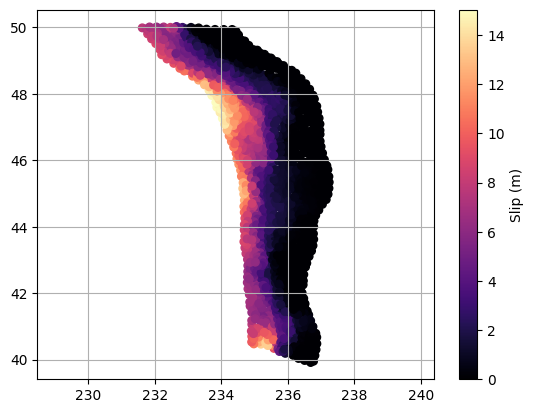

In [50]:
# Ok let's plot the "subfaults" as individual symbols
plt.scatter(rupt[:, 1], rupt[:, 2], c=rupt[:, 9], cmap='magma', s=30)
plt.colorbar(label='Slip (m)')
plt.axis('equal')
plt.grid(which='both')

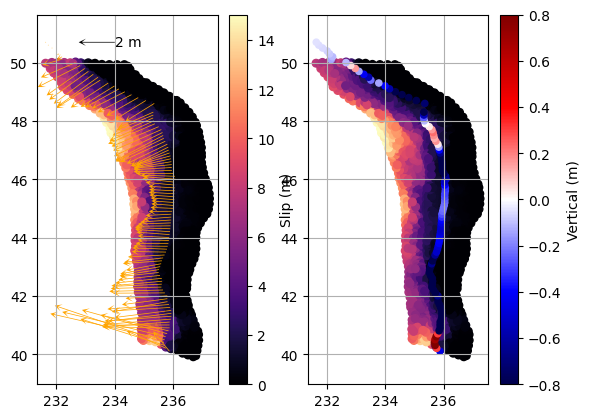

In [65]:
#let's plot the deformation assocaited with this (from previous notebook)

deformation = np.genfromtxt(deformation_path)

#too many, decimate
deformation = deformation[::10, :]

plt.figure()

plt.subplot(121)

plt.scatter(rupt[:, 1], rupt[:, 2], c=rupt[:, 9], cmap='magma', s=30)
plt.colorbar(label='Slip (m)')
plt.axis('equal')
plt.grid(which='both')

# plt.scatter(deformation[:, 1], deformation[:, 2], marker='^',facecolor='blue', edgecolor='w', s=20,lw=0.1)
# Add a horizontal arrow as a scale at lat = 50.7 with length 1
plt.quiver(234, 50.7, -2, 0, color='k', scale=10, width=0.004, headlength=10, headwidth=10, zorder=10)
plt.text(234, 50.7, '2 m', color='k', va='center', fontsize=10)

plt.quiver(deformation[:, 1], deformation[:, 2], deformation[:, 4], deformation[:, 3],
           color='orange', scale=10, width=0.004, headlength=10, headwidth=10)


plt.subplot(122)

plt.scatter(rupt[:, 1], rupt[:, 2], c=rupt[:, 9], cmap='magma', s=30)

plt.axis('equal')
plt.grid(which='both')
plt.scatter(deformation[:, 1], deformation[:, 2],c=deformation[:, 5], cmap='seismic', s=20,vmin=-0.8,vmax=0.8)
plt.colorbar(label='Vertical (m)')




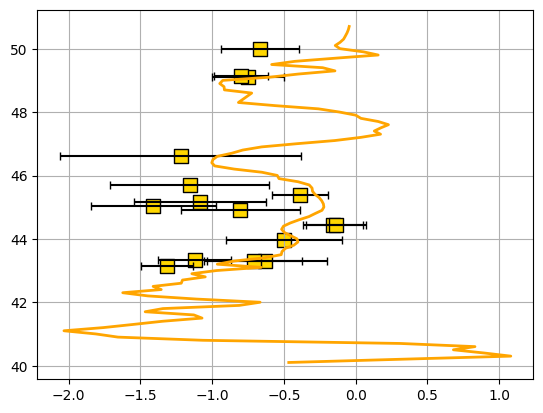

In [52]:
#Ok now let's compare tot he paleoseismology

paleo = np.genfromtxt('/Users/dmelgarm/Cascadia1700/paleo/paleo_data.txt')

plt.figure()
plt.errorbar(paleo[:,2], paleo[:,0], xerr=paleo[:,3], fmt='none', ecolor='k', capsize=3)
plt.scatter(paleo[:,2],paleo[:,0],marker='s',facecolor='gold', edgecolor='k', s=100)

# plt.plot(deformation[:, 5], deformation[:, 2], color='orange', lw=2, label='Deformation')
z = deformation[:, 5]
lat = deformation[:, 2]
i = np.argsort(lat)
lat = lat[i]
z= z[i]
plt.plot(z,lat, color='orange', lw=2, label='Deformation')
plt.grid(which='both')



OK we can tell this is a "bad" model, but how bad? WE will use RMS as a measure of badness, but first I need to interpoalte to know the values fo the deformation at the paleo sites

In [53]:


#re read the deformation, i don;t want anything interpolated
deformation = np.genfromtxt(deformation_path)
z = deformation[:, 5]
lat = deformation[:, 2]
i = np.argsort(lat)
lat = lat[i]
z= z[i]

interp = interp1d(lat, z, kind='linear', bounds_error=False, fill_value='extrapolate')

#get the susbidence predicted byt he model at the paleo points
paleo_z = interp(paleo[:, 0])

#Calcaulte the RMS error
rms = np.sqrt(np.mean((paleo_z - paleo[:, 2])**2))
print(f'RMS error: {rms:.3f} m')


RMS error: 0.535 m


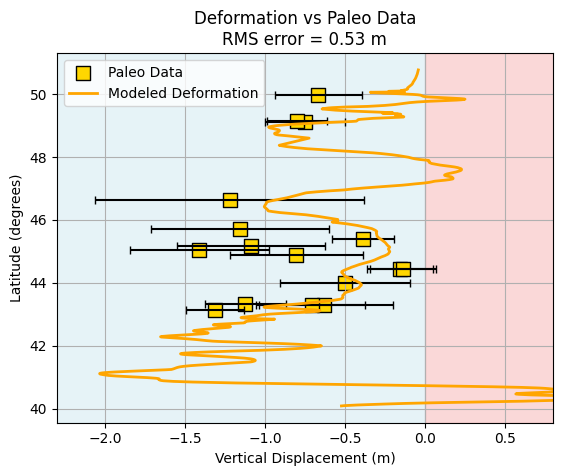

In [54]:
#Make plot again but include error and define "good" as 0.5
plt.figure()
plt.errorbar(paleo[:,2], paleo[:,0], xerr=paleo[:,3], fmt='none', ecolor='k', capsize=3)
plt.scatter(paleo[:,2], paleo[:,0], marker='s', facecolor='gold', edgecolor='k', s=100, label='Paleo Data')
plt.plot(z, lat, color='orange', lw=2, label='Modeled Deformation')
plt.grid(which='both')
plt.title(f'Deformation vs Paleo Data\nRMS error = {rms:.2f} m')
plt.axvspan(-2.5, 0, color='lightblue', alpha=0.3, zorder=0)
plt.axvspan(0, 1, color='lightcoral', alpha=0.3, zorder=0)
plt.xlim(-2.3,0.8)
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Latitude (degrees)')
plt.legend()

(39.5, 50.5)

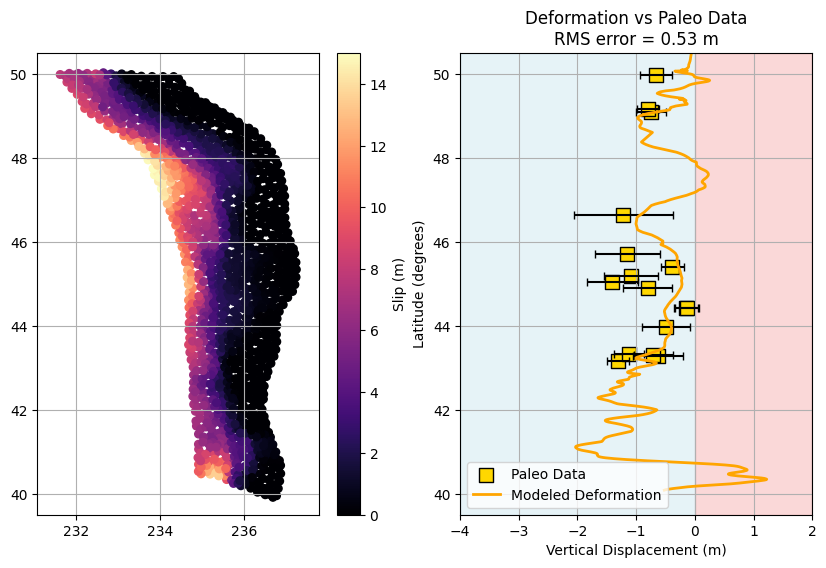

In [55]:
#now plot the slip model and the deformation together ina s ingle almost publication quality plot!
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.scatter(rupt[:, 1], rupt[:, 2], c=rupt[:, 9], cmap='magma', s=30)
plt.colorbar(label='Slip (m)')
plt.axis('equal')
plt.grid(which='both')
plt.ylim(39.5, 50.5)

plt.subplot(122)
plt.errorbar(paleo[:,2], paleo[:,0], xerr=paleo[:,3], fmt='none', ecolor='k', capsize=3)
plt.scatter(paleo[:,2], paleo[:,0], marker='s', facecolor='gold', edgecolor='k', s=100, label='Paleo Data')
plt.plot(z, lat, color='orange', lw=2, label='Modeled Deformation')
plt.grid(which='both')
plt.title(f'Deformation vs Paleo Data\nRMS error = {rms:.2f} m')
plt.axvspan(-4, 0, color='lightblue', alpha=0.3, zorder=0)
plt.axvspan(0, 2, color='lightcoral', alpha=0.3, zorder=0)
plt.xlim(-4,2)
plt.xlabel('Vertical Displacement (m)')
plt.ylabel('Latitude (degrees)')
plt.legend()
plt.ylim(39.5, 50.5)


Now manually explore other ruptures, find one that you think is a good candidate for a "good" rupture, and then plot the deformation and paleo data again.

Is there a way to view all deformations? let's try to read every single deformation model and plot them as a grid

In [56]:
models_path = '/Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/statics/'
all_folders = glob(models_path + '*gamma*')
all_folders.sort()

N_deformation_points = len(deformation)
N_scenarios = len(all_folders)

all_deformations = np.zeros((N_deformation_points, N_scenarios))

# loop over all the folders and read the file
for k in range(len(all_folders)):
    folder = all_folders[k]
    #print(f'Reading {folder}')
    file_path = folder + '/statics.neu'
    data = np.genfromtxt(file_path)

    #make sure they are sorted (remember the issue before)
    z = data[:, 5]
    lat = data[:, 2]
    i = np.argsort(lat)
    lat = lat[i]
    z= z[i]

    # only add the 5th column (index 5)
    all_deformations[:,k] = z


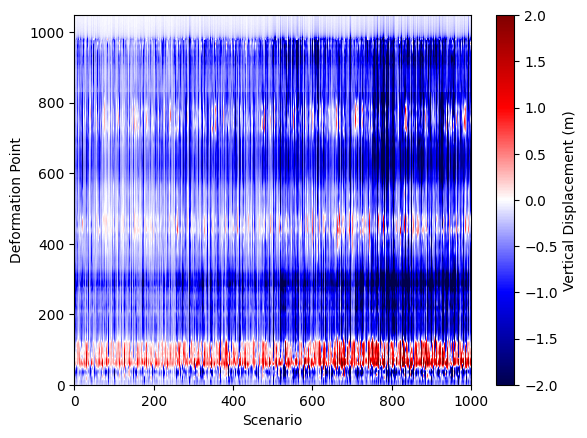

In [57]:
# a quick and dirty view

plt.figure()
plt.pcolormesh(all_deformations, cmap='seismic', vmin=-2, vmax=2)
plt.xlabel('Scenario')
plt.ylabel('Deformation Point')
plt.colorbar(label='Vertical Displacement (m)')

In [58]:
#calculate the RMS misfit for ALL of them and save the results in a numpy array and plot with this same figure
rms_all_ruptures = np.zeros(N_scenarios)

# loop over all the folders and read the file
for k in range(len(all_folders)):
    folder = all_folders[k]
    #print(f'Reading {folder}')
    file_path = folder + '/statics.neu'
    data = np.genfromtxt(file_path)

    #make sure they are sorted (remember the issue before)
    z = data[:, 5]
    lat = data[:, 2]
    i = np.argsort(lat)
    lat = lat[i]
    z= z[i]

    interp = interp1d(lat, z, kind='linear', bounds_error=False, fill_value='extrapolate')

    #get the susbidence predicted byt the model at the paleo points
    paleo_z = interp(paleo[:, 0])

    #Calcaulte the RMS error
    rms = np.sqrt(np.mean((paleo_z - paleo[:, 2])**2))
    rms_all_ruptures[k] = rms


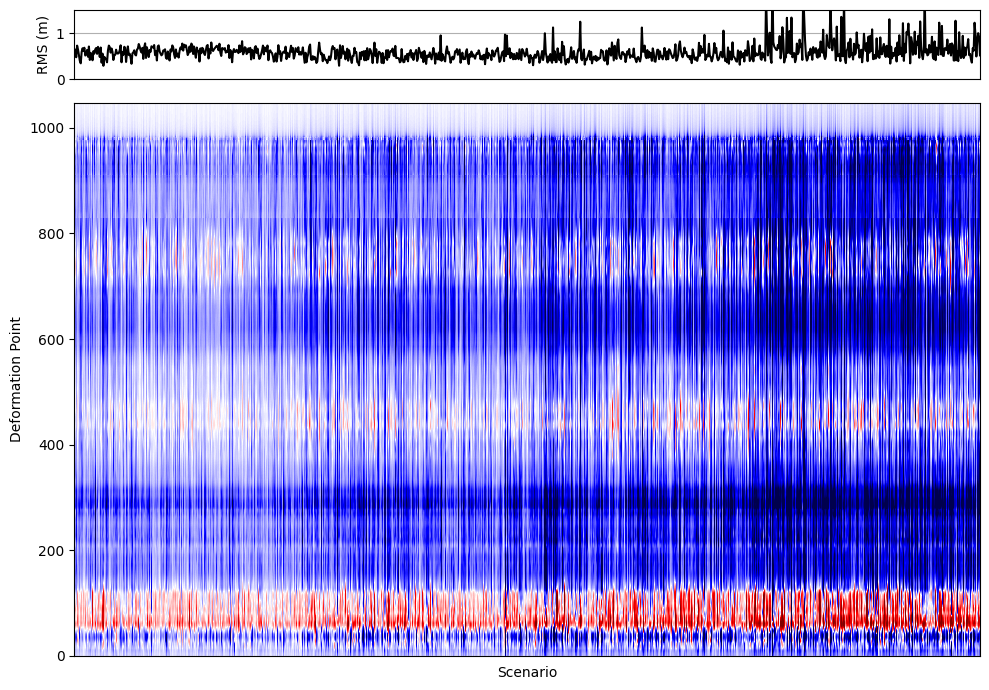

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [1, 8]}, sharex=True)

# Top axis: RMS line plot
ax[0].plot(rms_all_ruptures, color='k')
ax[0].set_ylabel('RMS (m)')
ax[0].set_xlim(0, N_scenarios-1)
ax[0].set_ylim(0, 1.5)
ax[0].grid(True)
ax[0].set_xticks([])

# Bottom axis: Deformation heatmap
c = ax[1].pcolormesh(all_deformations, cmap='seismic', vmin=-2, vmax=2)
ax[1].set_xlabel('Scenario')
ax[1].set_ylabel('Deformation Point')
# fig.colorbar(c, ax=ax[1], label='Vertical Displacement (m)')

plt.tight_layout()
plt.show()

Next up, let's find those 10 best scnearios and plot them in a single figure with the paleo data